<center><h1><b>FLIGHT DELAY PREDICTION</b></h1></center>

![AEROPLANE IMAGE](AEROPLANE.jpg)


## Problem definition.

 >Predicting flight delays for the upcoming January 2020 using flight data from January 2019 and January 2020.
     It's a binary classification task.
     Each dataset contains 21 variables.
     The dataset includes flights from both January 2019 and January 2020.
     The target variable for classification is 'ARR_DEL15'.

### Variable dictionary:
     -'DAY_OF_MONTH': Day of the month.
     -'DAY_OF_WEEK': Day of the week.
     -'OP_UNIQUE_CARRIER': Unique transport code.
     -'OP_CARRIER_AIRLINE_ID': Unique aviation operator code.
     -'OP_CARRIER': IATA code of the operator.
     -'TAIL_NUM': Tail number.
     -'OP_CARRIER_FL_NUM': Flight number.
     -'ORIGIN_AIRPORT_ID': Origin airport ID.
     -'ORIGIN_AIRPORT_SEQ_ID': Origin airport ID - SEQ.
     -'ORIGIN': Airport of Origin.
     -'DEST_AIRPORT_ID': ID of the destination airport.
     -'DEST_AIRPORT_SEQ_ID': Destination airport ID - SEQ.
     -'DEST': Destination airport.
     -'DEP_TIME': Flight departure time.
     -'DEP_DEL15': Departure delay indicator
     -'DEP_TIME_BLK': block of time (hour) where the match has been postponed.
     -'ARR_TIME': Flight arrival time.
     -'ARR_DEL15': Arrival delay indicator.
     -'CANCELLED': Flight cancellation indicator.
     -'DIVERTED': Indicator if the flight has been diverted.
     -'DISTANCE': Distance between airports.


In [56]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# Enable inline plotting
%matplotlib inline

# Set the seaborn style to 'darkgrid'
sns.set_style('darkgrid')

# Set the font size for plots
matplotlib.rcParams['font.size'] = 14

# Set the default figure size
matplotlib.rcParams['figure.figsize'] = (10, 6)

# Set the figure facecolor to transparent
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
os.getcwd()

'C:\\Users\\Lenovo\\Documents\\Python Scripts\\FLIGHT DELAYS DATA'

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'AEROPLANE.jpg',
 'airport_codes.csv',
 'analysis-and-prediction.ipynb',
 'archive (2).zip',
 'eda-understanding-the-data.ipynb',
 'FLIGHT DELAY PREDICTION.ipynb',
 'flight-delay-decisiontreeclassifier-with-83-auc.ipynb',
 'Jan_2019_ontime.csv',
 'Jan_2020_ontime.csv',
 'predicting-the-delay-of-flights-auc-0-88 (1).ipynb']

In [5]:
# Reading data from CSV files
data1 = pd.read_csv('Jan_2019_ontime.csv')
data2 = pd.read_csv('Jan_2020_ontime.csv')

In [6]:
#Creating year indicator.
data1['YEAR'] = 2019
data2['YEAR'] = 2020

In [7]:
#Checking if the bases have the same columns
print(set(data2.columns) == set(data1.columns))

True


In [8]:
#Generating the unique base
flight_df = pd.concat([data1,data2])

In [9]:
flight_df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21,YEAR
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN,2019
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN,2019
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN,2019
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN,2019
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN,2019


In [10]:
# Display information about the flight_df DataFrame
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191331 entries, 0 to 607345
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   DAY_OF_MONTH           1191331 non-null  int64  
 1   DAY_OF_WEEK            1191331 non-null  int64  
 2   OP_UNIQUE_CARRIER      1191331 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  1191331 non-null  int64  
 4   OP_CARRIER             1191331 non-null  object 
 5   TAIL_NUM               1188090 non-null  object 
 6   OP_CARRIER_FL_NUM      1191331 non-null  int64  
 7   ORIGIN_AIRPORT_ID      1191331 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  1191331 non-null  int64  
 9   ORIGIN                 1191331 non-null  object 
 10  DEST_AIRPORT_ID        1191331 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    1191331 non-null  int64  
 12  DEST                   1191331 non-null  object 
 13  DEP_TIME               1168315 non-null  float64
 14  DEP_DEL15          

In [11]:
# The number of missing values in each column
missing_values = flight_df.isna().sum().sort_values(ascending=False)
missing_values

Unnamed: 21              1191331
ARR_DEL15                  26100
ARR_TIME                   24136
DEP_DEL15                  23054
DEP_TIME                   23016
TAIL_NUM                    3241
DAY_OF_MONTH                   0
DEST                           0
DISTANCE                       0
DIVERTED                       0
CANCELLED                      0
DEP_TIME_BLK                   0
DEST_AIRPORT_SEQ_ID            0
DAY_OF_WEEK                    0
DEST_AIRPORT_ID                0
ORIGIN                         0
ORIGIN_AIRPORT_SEQ_ID          0
ORIGIN_AIRPORT_ID              0
OP_CARRIER_FL_NUM              0
OP_CARRIER                     0
OP_CARRIER_AIRLINE_ID          0
OP_UNIQUE_CARRIER              0
YEAR                           0
dtype: int64

In [12]:
# The number of duplicate rows in the flight_df DataFrame
duplicate_count = flight_df.duplicated().sum()
duplicate_count

0

In [13]:
# The count of unique values for each column in the flight_df DataFrame
unique_value_counts = flight_df.nunique().sort_values(ascending=False)

### DATA CLEANING

In [14]:
# Removing unnecessary columns from flight_df
columns_to_drop = [
    'OP_CARRIER_FL_NUM',
    'OP_CARRIER_AIRLINE_ID',
    'OP_CARRIER',
    'TAIL_NUM',
    'ORIGIN_AIRPORT_ID',
    'ORIGIN_AIRPORT_SEQ_ID',
    'DEST_AIRPORT_ID',
    'DEST_AIRPORT_SEQ_ID',
    'CANCELLED',
    'DIVERTED',
    'Unnamed: 21'
]
flight_df = flight_df.drop(columns=columns_to_drop, axis=1)

# Setting 'YEAR' as the index for flight_df
flight_df.set_index('YEAR', inplace=True)


In [15]:
def fill_missing_values_with_median(flight_df):
    """
    This function fills missing values in a DataFrame with the median value of each column.

    Args:
        flight_df (pd.DataFrame): The DataFrame containing flight data.

    Returns:
        pd.DataFrame: The DataFrame with missing values filled with median values.
    """
    # Fill missing values with the median of each column
    flight_df = flight_df.fillna(flight_df.median())
    
    return flight_df

In [16]:
flight_df = fill_missing_values_with_median(flight_df)
flight_df.isna().sum()

DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
ORIGIN               0
DEST                 0
DEP_TIME             0
DEP_DEL15            0
DEP_TIME_BLK         0
ARR_TIME             0
ARR_DEL15            0
DISTANCE             0
dtype: int64

### Data Exploration and Visualization

In [17]:
# The number of flights that arrived late.
def count_late_arrivals(flight_df):
    """
    Count the number of flights that arrived late.

    Args:
        flight_df (pd.DataFrame): DataFrame containing flight data with 'ARR_DEL15' column.

    Returns:
        int: Number of flights that arrived late.
    """
    # Filter the DataFrame for late arrivals (ARR_DEL15 == 1) and calculate the sum.
    arr_late = (flight_df['ARR_DEL15'] == 1).sum()
    return arr_late

arr_late = count_late_arrivals(flight_df)
arr_late

187507

In [18]:
# The number of flights that arrived late as a percentage of the total flights.

def calculate_late_percentage(arr_late: int, flight_df: pd.DataFrame) -> float:
    """
    Calculate the percentage of flights that arrived late.

    Args:
        arr_late (int): The number of flights that arrived late.
        flight_df (pd.DataFrame): DataFrame containing flight data.

    Returns:
        float: The late arrival percentage.
    """
    total_flights = len(flight_df)
    late_percentage = (arr_late / total_flights) * 100
    return late_percentage

late_percentage = calculate_late_percentage(arr_late, flight_df)
late_percentage

15.739286562676536

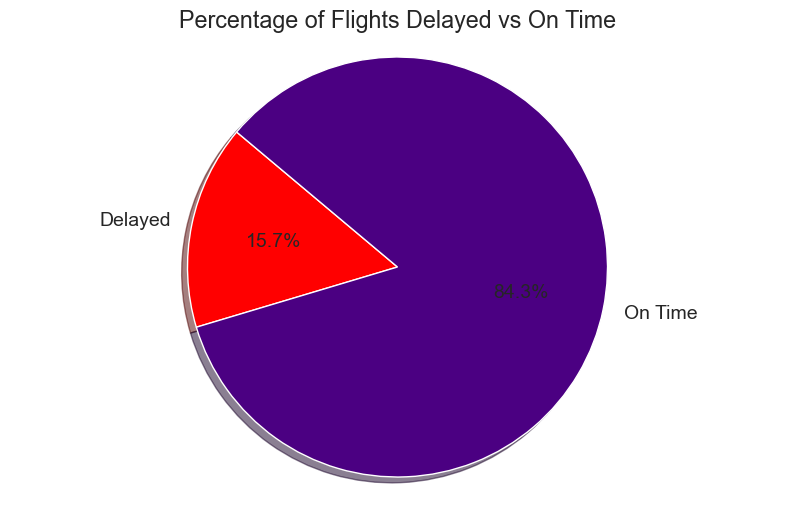

In [19]:
# A pie chart showing the number of flights that delayed to the number of flights that didn't.

# Calculating the number of flights that arrived late using my function
arr_late = (flight_df.ARR_DEL15 == 1).sum()

# Number of flights that arrived on time
arr_early = (flight_df.ARR_DEL15 == 0).sum()

# Labels and sizes for the pie chart
labels = ['Delayed', 'On Time']
sizes = [arr_late, arr_early]
colors = ['red', 'indigo']

# Creating the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.axis('equal')
plt.title('Percentage of Flights Delayed vs On Time')
plt.show()

In [20]:
# Which day of the week had the highest number of delayed flights?

delayed_flights = flight_df[flight_df.ARR_DEL15 == 1]

day_of_week_counts = delayed_flights.DAY_OF_WEEK.value_counts()

max_delayed_day = day_of_week_counts.idxmax() # The day of the week with the highest count
max_delayed_day

4

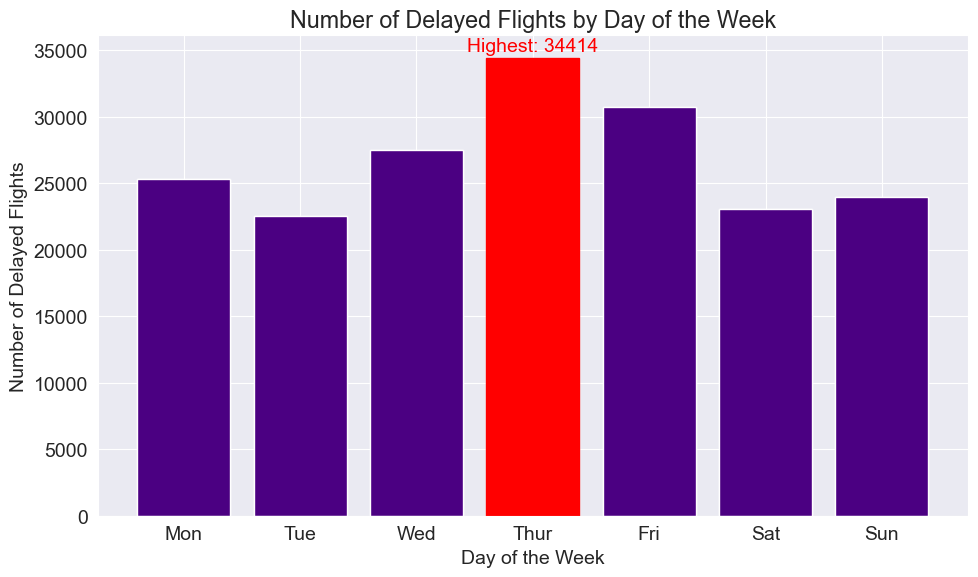

In [21]:
# A visualization of the day of the week with the highest number of delayed flights

# Sort the data by the day of the week in the correct order (Monday to Sunday)
sorted_days = [1, 2, 3, 4, 5, 6, 7]
day_of_week_counts = day_of_week_counts.reindex(sorted_days)

plt.figure(figsize=(10, 6))
plt.bar(day_of_week_counts.index, day_of_week_counts.values, color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Delayed Flights')
plt.title('Number of Delayed Flights by Day of the Week')
plt.xticks(day_of_week_counts.index, ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()

# Annotate the day with the highest count
max_count = day_of_week_counts[max_delayed_day]
plt.annotate(f'Highest: {max_count}', (max_delayed_day, max_count), xytext=(0, 5),
             textcoords='offset points', ha='center', color='red')

# Iterate through the bars and set the color for the highest count bar to red
bars = plt.bar(day_of_week_counts.index, day_of_week_counts.values, color='indigo')
for i, bar in enumerate(bars):
    if day_of_week_counts.index[i] == max_delayed_day:
        bar.set_color('red')

plt.show()

Thursday had the highest number of delayed flights.

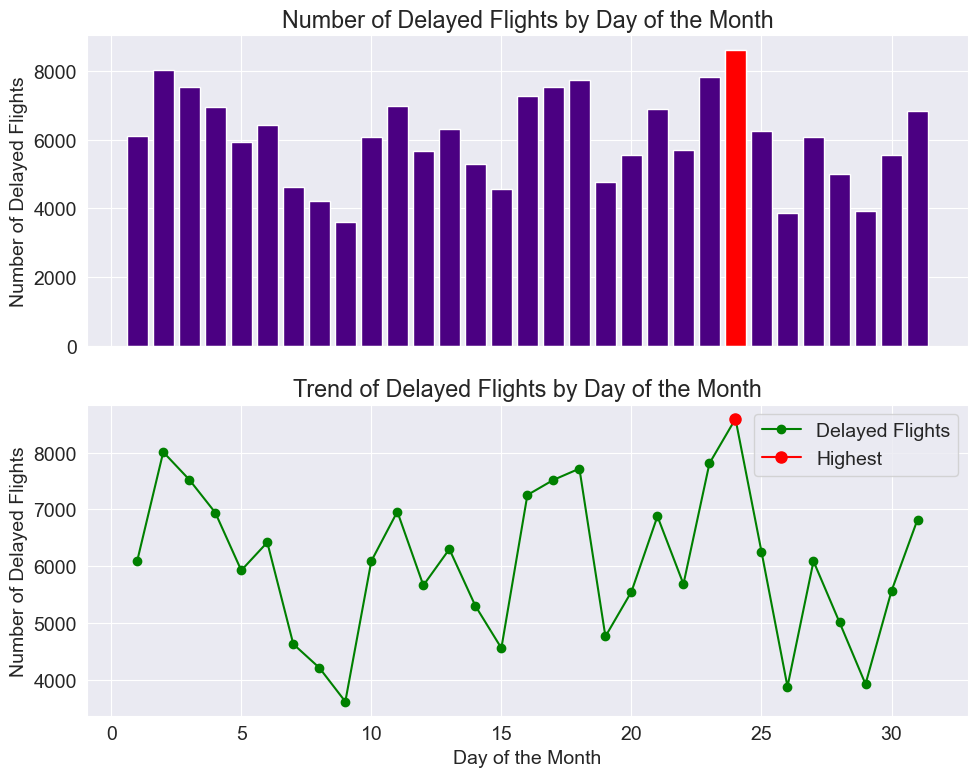

In [22]:
# Which day of the month had the highest number of delayed flights and is there any correlation between the day of the month and the delay of flights?

day_of_month_counts1 = delayed_flights.DAY_OF_MONTH.value_counts()
day_of_month_counts = day_of_month_counts1.sort_index(ascending=True)
max_delayed_day_month = day_of_month_counts.idxmax()

# Creating a figure with two subplots (bar chart and line graph)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Bar chart for the number of delayed flights by day of the month
ax1.bar(day_of_month_counts.index, day_of_month_counts.values, color='indigo')
ax1.set_ylabel('Number of Delayed Flights')
ax1.set_title('Number of Delayed Flights by Day of the Month')

# Highlighting the day with the highest count in red
ax1.bar(max_delayed_day_month, day_of_month_counts[max_delayed_day_month], color='red')

# Line graph to show the trend of delayed flights by day of the month
ax2.plot(day_of_month_counts.index, day_of_month_counts.values, marker='o', linestyle='-',
         color='green', label='Delayed Flights')
ax2.set_xlabel('Day of the Month')
ax2.set_ylabel('Number of Delayed Flights')
ax2.set_title('Trend of Delayed Flights by Day of the Month')

# Highlighting the day with the highest count with a red dot on the line graph
max_count = day_of_month_counts[max_delayed_day_month]
ax2.plot(max_delayed_day_month, max_count, marker='o', markersize=8, color='red', label='Highest')

# Adding a legend to the line graph
ax2.legend()

plt.tight_layout()
plt.show()

The 23rd day of the month had the highest number of delayed flights. There seems to be some degree of correlation between the day of the month and the number of delays--early and late in the month.

In [23]:
# Creating bins for the distance variable.
# Defining the bins (distance intervals)
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, float('inf')]

# Defining labels for the bins
labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', '2501-3000', '3001-3500', '3501-4000', '4001+']

# Creating a new column in the DataFrame to categorize flights based on DISTANCE
flight_df['Distance_Category'] = pd.cut(flight_df['DISTANCE'], bins=bins, labels=labels)

# Counting the number of delayed (ARR_DEL15 = 1) and on-time (ARR_DEL15 = 0) flights in each category
category_counts = flight_df.groupby(['Distance_Category', 'ARR_DEL15'])['DISTANCE'].count().unstack().fillna(0)

# Print the results
print(category_counts)


ARR_DEL15             0.0    1.0
Distance_Category               
0-500              384381  68848
501-1000           347288  65773
1001-1500          153952  30355
1501-2000           61466  11408
2001-2500           38709   7119
2501-3000           16186   3700
3001-3500             456     56
3501-4000             763    110
4001+                 623    138


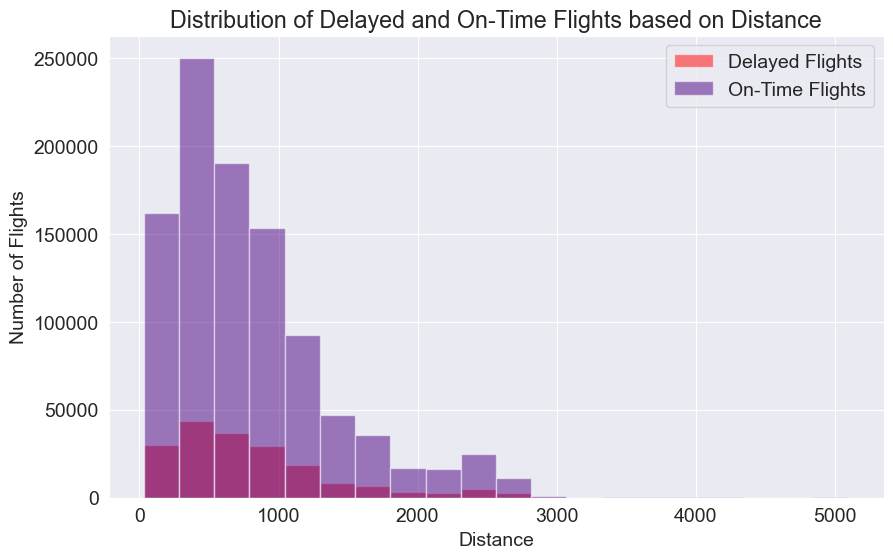

In [24]:
# A visualization showing the relationship between Distance and Delayed flights.
# Separating flights into delayed and on-time categories
delayed_flights = flight_df[flight_df['ARR_DEL15'] == 1]
on_time_flights = flight_df[flight_df['ARR_DEL15'] == 0]

# Creating histograms for both delayed and on-time flights
plt.hist(delayed_flights['DISTANCE'], bins=20, alpha=0.5, label='Delayed Flights', color='red')
plt.hist(on_time_flights['DISTANCE'], bins=20, alpha=0.5, label='On-Time Flights', color='indigo')

plt.xlabel('Distance')
plt.ylabel('Number of Flights')
plt.title('Distribution of Delayed and On-Time Flights based on Distance')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


The number of delayed flights decreases as the distance increases.

In [25]:
# Finding the relationship between the airport origin and the delayed flights.
# Grouping the data by 'ORIGIN' and calculate counts and percentages of delayed and on-time flights

origin_delay_stats = flight_df.groupby('ORIGIN')['ARR_DEL15'].value_counts().unstack(fill_value=0)
origin_delay_stats.columns = ['On-Time Flights', 'Delayed Flights']
origin_delay_stats['Total Flights'] = origin_delay_stats['On-Time Flights'] + origin_delay_stats['Delayed Flights']
origin_delay_stats['% On-Time'] = (origin_delay_stats['On-Time Flights'] / origin_delay_stats['Total Flights']) * 100
origin_delay_stats['% Delayed'] = 100 - origin_delay_stats['% On-Time']

# Display the table
origin_delay_stats


,On-Time Flights,Delayed Flights,Total Flights,% On-Time,% Delayed
ORIGIN,,,,,
ABE,577,125,702,82.193732,17.806268
ABI,260,78,338,76.923077,23.076923
ABQ,3177,399,3576,88.842282,11.157718
ABR,103,21,124,83.064516,16.935484
ABY,156,12,168,92.857143,7.142857
...,...,...,...,...,...
WRG,99,25,124,79.838710,20.161290
XNA,1817,369,2186,83.119854,16.880146
XWA,51,17,68,75.000000,25.000000


In [26]:
# Finding the airport with the highest number of delayed flights

airport_with_highest_delayed_flights = origin_delay_stats['Delayed Flights'].idxmax()

# Finding the country with the highest number of on-time flights (vice versa)

airport_with_highest_on_time_flights = origin_delay_stats['On-Time Flights'].idxmax()

print("airport with the highest number of delayed flights:", airport_with_highest_delayed_flights)
print("Number of delayed flights in that airport:", origin_delay_stats['Delayed Flights'].max())

print("\nairport with the highest number of on-time flights:", airport_with_highest_on_time_flights)
print("Number of on-time flights in that airport:", origin_delay_stats['On-Time Flights'].max())


airport with the highest number of delayed flights: ORD
Number of delayed flights in that airport: 12342

airport with the highest number of on-time flights: ATL
Number of on-time flights in that airport: 56074


> - Chicago O'Hare International Airport == ORD
> - Hartsfield Jackson Atlanta International Airport == ATL


In [27]:
# Concentration of delays due to 'DEP_TIME_BLK'

# Calculate the count of delays (ARR_DEL15 = 1) for each time block
delay_counts = flight_df[flight_df['ARR_DEL15'] == 1].groupby('DEP_TIME_BLK')['ARR_DEL15'].count()

# Calculate the total count of flights for each time block
total_counts = flight_df.groupby('DEP_TIME_BLK')['ARR_DEL15'].count()

# Calculate the percentage of delays for each time block
percentage_delays = (delay_counts / total_counts) * 100

# Create a DataFrame to display the results
concentration_of_delays = pd.DataFrame({'Delay_Count': delay_counts, 'Total_Count': total_counts, 'Percentage_Delay': percentage_delays})

concentration_of_delays


,Delay_Count,Total_Count,Percentage_Delay
DEP_TIME_BLK,,,
0001-0559,3279,32187,10.187343
0600-0659,8334,86246,9.663057
0700-0759,8938,79248,11.278518
0800-0859,10060,78537,12.809249
0900-0959,9375,71095,13.186581
1000-1059,10708,71880,14.897051
1100-1159,11181,74866,14.934683
1200-1259,11761,75021,15.676944
1300-1359,11101,67981,16.329563


A significant number of the flight delays seem to be concentrated at around 6pm in the evening.

### Feature engineering

In [28]:
flight_df['OP_UNIQUE_CARRIER'].nunique()

17

In [29]:
# Convert 'ARR_DEL15' to a numeric type
flight_df['ARR_DEL15'] = pd.to_numeric(flight_df['ARR_DEL15'])

# Calculate the sum of 'ARR_DEL15' for each unique carrier
carrier_df = flight_df.groupby('OP_UNIQUE_CARRIER')['ARR_DEL15'].sum().reset_index()

# Sort the DataFrame by 'ARR_DEL15' in descending order
carrier_df = carrier_df.sort_values(by='ARR_DEL15', ascending=False)

# Add the 'CARRIER_cat' column using pd.qcut as you did before
carrier_df['CARRIER_cat'] = pd.qcut(carrier_df['ARR_DEL15'], 17, labels=False)

# >>>This code prepares a DataFrame (carrier_df) that summarizes the performance of unique carriers in terms of the number of delayed arrivals, categorizing them into groups based on their delay statistics.

carrier_df

,OP_UNIQUE_CARRIER,ARR_DEL15,CARRIER_cat
14,WN,26432.0,16
1,AA,25089.0,15
12,OO,24716.0,14
4,DL,17862.0,13
13,UA,15391.0,12
9,MQ,10823.0,11
3,B6,10104.0,10
16,YX,9292.0,9
11,OH,8641.0,8
2,AS,7899.0,7


In [30]:
# Step 1: Create a carrier to 'CARRIER_cat' dictionary
carrier_to_cat = carrier_df.set_index('OP_UNIQUE_CARRIER')['CARRIER_cat'].to_dict()

# Step 2: Map 'OP_UNIQUE_CARRIER' to 'CARRIER_cat' in flight_df
flight_df['CARRIER_cat'] = flight_df['OP_UNIQUE_CARRIER'].map(carrier_to_cat)

# >>>This code adds a new column 'CARRIER_cat' to the flight_df DataFrame, providing a categorical representation of each flight's carrier in terms of their performance regarding delayed arrivals.

In [31]:
flight_df['DEP_TIME_BLK'].nunique()

19

In [32]:
time_blk_df = flight_df[['DEP_TIME_BLK','ARR_DEL15']].groupby('DEP_TIME_BLK').sum().sort_values(by='ARR_DEL15',ascending=False)
time_blk_df['TIME_cat'] = pd.qcut(time_blk_df['ARR_DEL15'], 19, labels = False)

# >>>This code prepares a DataFrame (time_blk_df) that summarizes the performance of departure time blocks in terms of the number of delayed arrivals and categorizes them into groups based on their delay statistics.
time_blk_df

,ARR_DEL15,TIME_cat
DEP_TIME_BLK,,
1700-1759,14875.0,18
1800-1859,14020.0,17
1600-1659,13292.0,16
1500-1559,12760.0,15
1900-1959,12640.0,14
1400-1459,12618.0,13
1200-1259,11761.0,12
1100-1159,11181.0,11
1300-1359,11101.0,10


In [33]:
data_time = time_blk_df.loc[flight_df['DEP_TIME_BLK']].reset_index()
flight_df['DEP_TIME_cat'] = data_time['TIME_cat']

In [34]:
flight_df.ORIGIN.nunique()

353

In [35]:
origin_df = flight_df[['ORIGIN','ARR_DEL15']].groupby('ORIGIN').sum().sort_values(by='ARR_DEL15',ascending=False)
origin_df['ORIGIN_cat'] = pd.qcut(origin_df['ARR_DEL15'], 25, labels = False)

# >>> This code prepares a DataFrame (origin_df) that summarizes the performance of origin airports in terms of the number of delayed arrivals and categorizes them into groups based on their delay statistics.
origin_df

,ARR_DEL15,ORIGIN_cat
ORIGIN,,
ORD,12342.0,24
DFW,8802.0,24
ATL,7271.0,24
CLT,6622.0,24
DEN,5987.0,24
...,...,...
OWB,5.0,0
LWS,4.0,0
PPG,3.0,0


In [36]:
data_origin = origin_df.loc[flight_df['ORIGIN']].reset_index()
flight_df['ORIGIN_cat'] = data_origin['ORIGIN_cat']

In [37]:
flight_df.DEST.nunique()

353

In [38]:
dest_df = flight_df[['DEST','ARR_DEL15']].groupby('DEST').sum().sort_values(by='ARR_DEL15',ascending=False)
dest_df['DEST_cat'] = pd.qcut(dest_df['ARR_DEL15'], 25, labels = False)
dest_df

,ARR_DEL15,DEST_cat
DEST,,
ORD,10170.0,24
DFW,8667.0,24
ATL,7263.0,24
LGA,7077.0,24
SFO,6114.0,24
...,...,...
OWB,3.0,0
ATY,3.0,0
ADK,3.0,0


In [39]:
data_dest = dest_df.loc[flight_df['DEST']].reset_index()
flight_df['DEST_cat'] = data_dest['DEST_cat']

### Data preprocessing

In [40]:
flight_df = flight_df[['DAY_OF_MONTH', 'DAY_OF_WEEK', 'CARRIER_cat', 'DEP_TIME_cat', 'ORIGIN_cat', 'DEST_cat', 'DISTANCE', 'ARR_DEL15']]

In [41]:
# Separate data for the year 2019
flight_2019 = flight_df.loc[2019]

# Separate data for the year 2020
flight_2020 = flight_df.loc[2020]


In [42]:
flight_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583985 entries, 2019 to 2019
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   DAY_OF_MONTH  583985 non-null  int64  
 1   DAY_OF_WEEK   583985 non-null  int64  
 2   CARRIER_cat   583985 non-null  int64  
 3   DEP_TIME_cat  583985 non-null  int64  
 4   ORIGIN_cat    583985 non-null  int64  
 5   DEST_cat      583985 non-null  int64  
 6   DISTANCE      583985 non-null  float64
 7   ARR_DEL15     583985 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 40.1 MB


In [66]:
# Due to the large number of feature vectors in the data, I will choose a random sample of 60,000 for data training and testing.
# Defining the sample size
sample_size = 60000

# Randomly sample data from flight_df with a specified sample size and seed
flight_sample = flight_df.sample(n=sample_size, random_state=42)


In [44]:
# We first separate the inputs from the target variable

input_df = flight_sample.drop('ARR_DEL15', axis=1)
target_df =  flight_sample[['ARR_DEL15']]

In [45]:
# This code counts the occurrences of each unique value in the target_df DataFrame.

target_df.value_counts()

ARR_DEL15
0.0          50450
1.0           9550
dtype: int64

In [46]:
# Assigning input_df to X and target_df to y for clarity
X = input_df
y = target_df

In [47]:
# Importing the SMOTE class from the imblearn.over_sampling module
from imblearn.over_sampling import SMOTE

In [48]:
# I will use the smote() function to rectify the skewness inherent in the data.
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [49]:
# Changing the scale of the feature vectors to ensure compatibility with the machine learning models.
X = StandardScaler().fit_transform(X)
X = MinMaxScaler().fit_transform(X)

In [50]:
X.shape

(100900, 7)

In [51]:
y = y.values.ravel()  # Convert y to a one-dimensional numpy array

In [52]:
y.shape

(100900,)

In [53]:
# Import the train_test_split function
from sklearn.model_selection import train_test_split

In [54]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

### 1) Decision Tree

In [57]:
# Create a Decision Tree classifier
tree_classifier = DecisionTreeClassifier()

# Train the Decision Tree classifier on the training data
tree_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_tree = tree_classifier.predict(X_test)

# Calculate the accuracy of the Decision Tree classifier
accuracy_tree = accuracy_score(y_test, y_pred_tree)

print(f'Decision Tree Accuracy: {accuracy_tree * 100:.2f}%')

Decision Tree Accuracy: 77.36%


### Hyperparameter tuning
> - max_depth
> - min_samples_split

In [58]:
# Initialize a list to store accuracy values
accuracy_values = []

# Define a range of max_depth values to try
max_depth_values = [None, 10, 20, 30, 40, 50]

# Iterate over max_depth values
for max_depth in max_depth_values:
    # Create a Decision Tree classifier with the current max_depth
    tree_classifier = DecisionTreeClassifier(max_depth=max_depth)

    # Train the Decision Tree classifier on the training data
    tree_classifier.fit(X_train, y_train)

    # Make predictions on the validation data
    y_pred_tree = tree_classifier.predict(X_test)

    # Calculate the accuracy of the Decision Tree classifier on the validation set
    accuracy_tree = accuracy_score(y_test, y_pred_tree)
    accuracy_values.append(accuracy_tree)

# Find the max_depth that gives the highest accuracy
best_max_depth = max_depth_values[accuracy_values.index(max(accuracy_values))]

print(f'Best max_depth: {best_max_depth}')
print(f'Best accuracy: {max(accuracy_values) * 100:.2f}%')


Best max_depth: 50
Best accuracy: 77.36%


In [59]:
# Initialize a list to store accuracy values
accuracy_values = []

# Define a range of min_samples_split values to try
min_samples_split_values = [2, 5, 10, 20, 30, 40]

# Iterate over min_samples_split values
for min_samples_split in min_samples_split_values:
    # Create a Decision Tree classifier with the current min_samples_split
    tree_classifier = DecisionTreeClassifier(min_samples_split=min_samples_split)

    # Train the Decision Tree classifier on the training data
    tree_classifier.fit(X_train, y_train)

    # Make predictions on the validation data
    y_pred_tree = tree_classifier.predict(X_test)

    # Calculate the accuracy of the Decision Tree classifier on the validation set
    accuracy_tree = accuracy_score(y_test, y_pred_tree)
    accuracy_values.append(accuracy_tree)

# Find the min_samples_split that gives the highest accuracy
best_min_samples_split = min_samples_split_values[accuracy_values.index(max(accuracy_values))]

print(f'Best min_samples_split: {best_min_samples_split}')
print(f'Best accuracy: {max(accuracy_values) * 100:.2f}%')


Best min_samples_split: 2
Best accuracy: 77.33%


In [60]:
# Create a Decision Tree classifier with max_depth=50 and min_samples_split=2
tree_classifier = DecisionTreeClassifier(max_depth=50, min_samples_split=2)

# Train the Decision Tree classifier on the training data
tree_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_tree = tree_classifier.predict(X_test)

# Calculate the accuracy of the Decision Tree classifier
accuracy_tree = accuracy_score(y_test, y_pred_tree)

print(f'Decision Tree Accuracy (max_depth=50, min_samples_split=2): {accuracy_tree * 100:.2f}%')

Decision Tree Accuracy (max_depth=50, min_samples_split=2): 77.32%


### 2) Random Forest

In [61]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Calculate the accuracy of the Random Forest classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')

Random Forest Accuracy: 76.81%


### Hyperparameter tuning
> - n_estimators
> - max_depth

In [62]:
# Initialize a list to store accuracy values
accuracy_values = []

# Define a range of n_estimators values to try
n_estimators_values = [10, 50, 100, 200, 300]

# Iterate over n_estimators values
for n_estimators in n_estimators_values:
    # Create a Random Forest classifier with the current n_estimators
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators)

    # Train the Random Forest classifier on the training data
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred_rf = rf_classifier.predict(X_test)

    # Calculate the accuracy of the Random Forest classifier
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    accuracy_values.append(accuracy_rf)

# Find the n_estimators that gives the highest accuracy
best_n_estimators = n_estimators_values[accuracy_values.index(max(accuracy_values))]

print(f'Best n_estimators: {best_n_estimators}')
print(f'Best accuracy: {max(accuracy_values) * 100:.2f}%')

Best n_estimators: 50
Best accuracy: 76.84%


In [63]:
# Initialize a list to store accuracy values
accuracy_values = []

# Define a range of max_depth values to try
max_depth_values = [10, 20, 30, 40, 50]

# Iterate over max_depth values
for max_depth in max_depth_values:
    # Create a Random Forest classifier with the current max_depth
    rf_classifier = RandomForestClassifier(max_depth=max_depth)

    # Train the Random Forest classifier on the training data
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred_rf = rf_classifier.predict(X_test)

    # Calculate the accuracy of the Random Forest classifier
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    accuracy_values.append(accuracy_rf)

# Find the max_depth that gives the highest accuracy
best_max_depth = max_depth_values[accuracy_values.index(max(accuracy_values))]

print(f'Best max_depth: {best_max_depth}')
print(f'Best accuracy: {max(accuracy_values) * 100:.2f}%')

Best max_depth: 50
Best accuracy: 76.92%


In [65]:
# Create a Random Forest classifier with max_depth=30 and n_estimators=50
rf_classifier = RandomForestClassifier(max_depth=50, n_estimators=50)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Calculate the accuracy of the Random Forest classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f'Random Forest Accuracy (max_depth=30, n_estimators=50): {accuracy_rf * 100:.2f}%')

Random Forest Accuracy (max_depth=30, n_estimators=50): 76.95%


### Feature importance

In [72]:
X_train.shape

(80720, 7)

In [73]:
X_train = pd.DataFrame(X_train, columns=['DAY_OF_MONTH', 'DAY_OF_WEEK', 'CARRIER_cat', 'DEP_TIME_cat', 'ORIGIN_cat', 'DEST_cat', 'DISTANCE'])

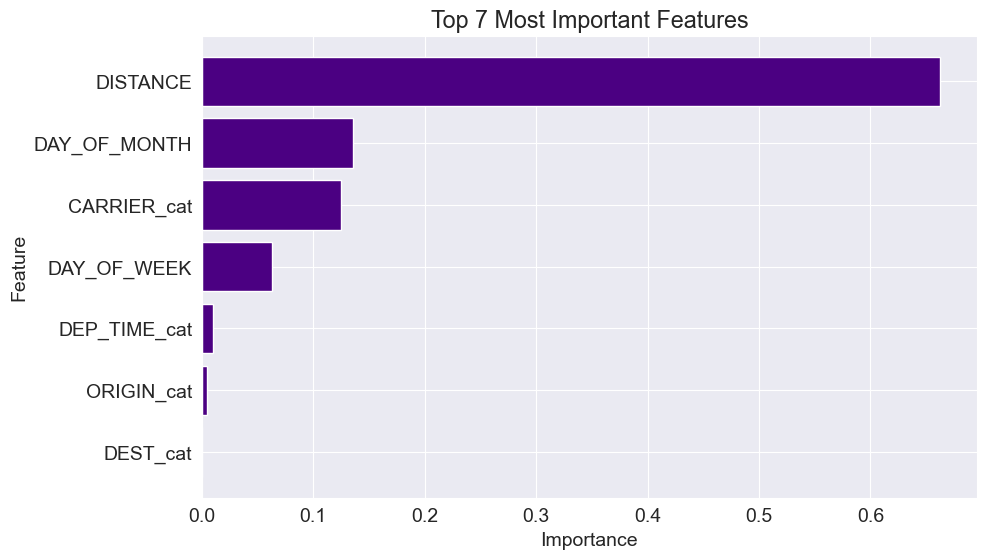

In [75]:
# Getting feature importances from the trained Random Forest classifier
feature_importances = rf_classifier.feature_importances_

# Creating a DataFrame to associate feature names with their importance scores
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sorting features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Ploting the top N most important features
bar_color = 'indigo'
top_n = 7
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n], color=bar_color)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Most Important Features')
plt.gca().invert_yaxis()  # Inverting the y-axis to show the most important features at the top
plt.show()


### Inference

>- Distance is the most important variable for predictions.
>- I used both the Decision tree and the Random forest models to train and make predictions based on the 2019 flight delay data set. Both models performed decently well with an accuracy score of 77.32% and 76.95% respectively.

### Conclusion

> Both the Decision tree and the Random forest models can be used to predict future flight delays.
> Based on the predictions, the concerned authorities can come up with strategies of reducing the number of flight delays and thus increase efficiency in the air transport sector.

### Reference

> - Predicting the delay of flights: https://www.kaggle.com/code/brunovinicius154/predicting-the-delay-of-flights-auc-0-88
> - EDA (understanding the data): https://www.kaggle.com/code/vasudevmaduri/eda-understanding-the-data

In [76]:
!pip install jovian --upgrade --quiet

In [77]:
import jovian

<IPython.core.display.Javascript object>

In [78]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Please enter your API key ( from https://jovian.com/ ):
API KEY: ········
[jovian] Committed successfully! https://jovian.com/moseskinuthia73/flight-delay-prediction-cf174


'https://jovian.com/moseskinuthia73/flight-delay-prediction-cf174'